In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sbn
import scipy.stats as stats
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import datetime as dt
import pandasql as ps

In [2]:
data = pd.read_csv('~/Downloads/EIA930_BALANCE_2020_Jan_Jun.csv')
data_2 = pd.read_csv('~/Downloads/EIA930_BALANCE_2020_Jul_Dec.csv')

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (11,14,15,16,17,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (11,14,16,17,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
def change_cols_to_floats(dataframe,lst):
    
    for i in lst:
        dataframe[i] = dataframe[i].str.replace(',', '')
        dataframe[i] = dataframe[i].astype(float)
    return dataframe
def make_date_time_col(df):
    df['Hour Number'] = df_total['Hour Number'].replace(24, 0)
    df['Hour Number'] = df_total['Hour Number'].replace(25, 0)
    df['Data Date']= df['Data Date'].astype(str)
    df['Hour Number'] = df['Hour Number'].astype(str)
    df['New_datetime'] = df['Data Date'].map(str) + " " + df['Hour Number']
    df['Hour Number'] = df['Hour Number'].astype(int)
    
    return df

def make_hourly_demand_means(df,lst = np.arange(0,24) ):
    '''input Dataframe, list'''
    d = {}
    for i in lst:
        filt =df['Hour Number']==i
        d[i] = df.loc[filt]['Demand (MW)'].mean()
    return d

def graph_maker_for_energy_type_by_hour(df,column, lst = np.arange(0,24)):
    
    d= {}
    for i in lst:
        filt =df['Hour Number']==i
        hour_avg = df.loc[filt][column].mean()
        d[i]=hour_avg
    x = d.keys()
    y = d.values()
    fig, ax =plt.subplots(figsize = (8,8))
    ax.plot(x, y)
    ax.set_title(column)
    ax.set_xlabel('Hours in Day')
    ax.set_ylabel('Energy (MW)')
    ax.set_xticks(lst)
    
    
    plt.show()

In [4]:
lst_cols = ['Demand (MW)','Net Generation (MW) from Natural Gas', 'Net Generation (MW) from Nuclear','Net Generation (MW) from All Petroleum Products','Net Generation (MW) from Hydropower and Pumped Storage', 'Net Generation (MW) from Solar', 'Net Generation (MW) from Wind', 'Net Generation (MW) from Other Fuel Sources','Net Generation (MW)','Demand Forecast (MW)', 'Total Interchange (MW)', 'Net Generation (MW) (Adjusted)','Net Generation (MW) from Coal','Sum(Valid DIBAs) (MW)','Demand (MW) (Imputed)', 'Net Generation (MW) (Imputed)','Demand (MW) (Adjusted)']
data_convert = change_cols_to_floats(data, lst_cols)
data_2_convert = change_cols_to_floats(data_2, lst_cols)

In [5]:
lst_data = [data_convert,data_2_convert]
df_total = pd.concat(lst_data)

In [6]:
make_date_time_col(df_total)

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from Coal,Net Generation (MW) from Natural Gas,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,New_datetime
0,AEC,01/01/2020,1,01/01/2020 1:00:00 AM,01/01/2020 7:00:00 AM,1082.0,549.0,722.0,173.0,173.0,...,-5.0,722.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,01/01/2020 1
1,AEC,01/01/2020,2,01/01/2020 2:00:00 AM,01/01/2020 8:00:00 AM,1084.0,549.0,724.0,175.0,175.0,...,-3.0,722.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,01/01/2020 2
2,AEC,01/01/2020,3,01/01/2020 3:00:00 AM,01/01/2020 9:00:00 AM,1103.0,554.0,718.0,164.0,164.0,...,-6.0,719.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,01/01/2020 3
3,AEC,01/01/2020,4,01/01/2020 4:00:00 AM,01/01/2020 10:00:00 AM,1127.0,565.0,715.0,150.0,150.0,...,-4.0,714.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,01/01/2020 4
4,AEC,01/01/2020,5,01/01/2020 5:00:00 AM,01/01/2020 11:00:00 AM,1179.0,575.0,718.0,143.0,143.0,...,-4.0,717.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,01/01/2020 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282671,YAD,12/31/2020,20,12/31/2020 8:00:00 PM,01/01/2021 1:00:00 AM,NaN,NaN,154.0,150.0,150.0,...,NaN,NaN,NaN,NaN,154.0,NaN,NaN,NaN,NaN,12/31/2020 20
282672,YAD,12/31/2020,21,12/31/2020 9:00:00 PM,01/01/2021 2:00:00 AM,NaN,NaN,153.0,150.0,150.0,...,NaN,NaN,NaN,NaN,153.0,NaN,NaN,NaN,NaN,12/31/2020 21
282673,YAD,12/31/2020,22,12/31/2020 10:00:00 PM,01/01/2021 3:00:00 AM,NaN,NaN,154.0,150.0,150.0,...,NaN,NaN,NaN,NaN,154.0,NaN,NaN,NaN,NaN,12/31/2020 22
282674,YAD,12/31/2020,23,12/31/2020 11:00:00 PM,01/01/2021 4:00:00 AM,NaN,NaN,154.0,151.0,151.0,...,NaN,NaN,NaN,NaN,154.0,NaN,NaN,NaN,NaN,12/31/2020 23


In [7]:
df_total['New_datetime']= df_total['New_datetime'].apply(lambda x:f'{x}:00:00')

In [8]:
df_total['New_datetime'] = pd.to_datetime(df_total['New_datetime'],infer_datetime_format=True, format ='%m/%d/%Y %H')

In [9]:
df_total['Demand Delta'] = df_total['Demand Forecast (MW)']- df_total['Demand (MW)']

In [10]:
df_total['Net Generation Delta'] = df_total['Net Generation (MW)']- df_total['Demand (MW)']

In [ ]:
# lst_hours = np.arange(0,24)  



In [12]:
make_hourly_demand_means(df_total)

{0: 6922.334387109932,
 1: 6468.399511301161,
 2: 7152.640769779045,
 3: 6998.285416030146,
 4: 6080.086872390264,
 5: 6139.650081482991,
 6: 7206.099302337424,
 7: 6713.549602770422,
 8: 7886.163865974132,
 9: 7288.728217141112,
 10: 8347.805948864216,
 11: 8533.530891865736,
 12: 8727.126273431133,
 13: 8886.620427916454,
 14: 9009.337477073568,
 15: 7399.706598726115,
 16: 9188.23905620955,
 17: 9310.143082802548,
 18: 8617.770575345257,
 19: 9469.125522372848,
 20: 9308.599133537207,
 21: 6532.888237692386,
 22: 7189.769430711992,
 23: 7388.96743119266}

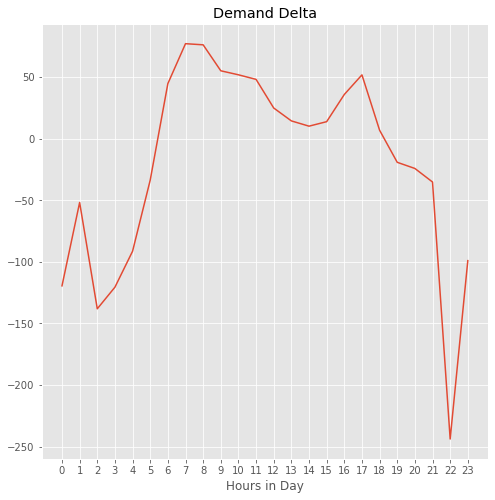

In [13]:
graph_maker_for_energy_type_by_hour(df_total,'Demand Delta') 

# TEXAS ERCOT

In [14]:
filter_1 = df_total['Balancing Authority'] == 'ERCO'
df_texas = df_total[filter_1]
df_texas

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,New_datetime,Demand Delta,Net Generation Delta
66924,ERCO,01/01/2020,1,01/01/2020 1:00:00 AM,01/01/2020 7:00:00 AM,37761.0,36649.0,36521.0,-128.0,-128.0,...,5117.0,NaN,20.0,0.0,12842.0,17.0,NaN,2020-01-01 01:00:00,1112.0,-128.0
66925,ERCO,01/01/2020,2,01/01/2020 2:00:00 AM,01/01/2020 8:00:00 AM,37154.0,36352.0,36225.0,-128.0,-128.0,...,5117.0,NaN,12.0,0.0,13340.0,13.0,NaN,2020-01-01 02:00:00,802.0,-127.0
66926,ERCO,01/01/2020,3,01/01/2020 3:00:00 AM,01/01/2020 9:00:00 AM,36644.0,35883.0,35824.0,-60.0,-60.0,...,5117.0,NaN,3.0,0.0,13926.0,15.0,NaN,2020-01-01 03:00:00,761.0,-59.0
66927,ERCO,01/01/2020,4,01/01/2020 4:00:00 AM,01/01/2020 10:00:00 AM,36668.0,35654.0,35532.0,-123.0,-123.0,...,5117.0,NaN,5.0,0.0,14458.0,12.0,NaN,2020-01-01 04:00:00,1014.0,-122.0
66928,ERCO,01/01/2020,5,01/01/2020 5:00:00 AM,01/01/2020 11:00:00 AM,36600.0,35816.0,35737.0,-80.0,-81.0,...,5117.0,NaN,42.0,0.0,14735.0,13.0,NaN,2020-01-01 05:00:00,784.0,-79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70664,ERCO,12/31/2020,20,12/31/2020 8:00:00 PM,01/01/2021 2:00:00 AM,47945.0,49447.0,49287.0,-160.0,-161.0,...,5125.0,NaN,42.0,0.0,15591.0,12.0,NaN,2020-12-31 20:00:00,-1502.0,-160.0
70665,ERCO,12/31/2020,21,12/31/2020 9:00:00 PM,01/01/2021 3:00:00 AM,47758.0,48353.0,48320.0,-32.0,-32.0,...,5125.0,NaN,27.0,0.0,15447.0,11.0,NaN,2020-12-31 21:00:00,-595.0,-33.0
70666,ERCO,12/31/2020,22,12/31/2020 10:00:00 PM,01/01/2021 4:00:00 AM,47067.0,47095.0,47208.0,113.0,112.0,...,5125.0,NaN,19.0,0.0,14994.0,10.0,NaN,2020-12-31 22:00:00,-28.0,113.0
70667,ERCO,12/31/2020,23,12/31/2020 11:00:00 PM,01/01/2021 5:00:00 AM,45514.0,45460.0,45418.0,-42.0,-43.0,...,5127.0,NaN,0.0,0.0,14558.0,13.0,NaN,2020-12-31 23:00:00,54.0,-42.0


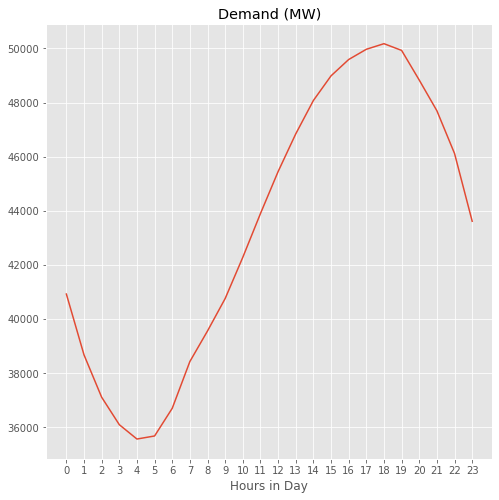

Index(['Balancing Authority', 'Data Date', 'Hour Number',
       'Local Time at End of Hour', 'UTC Time at End of Hour',
       'Demand Forecast (MW)', 'Demand (MW)', 'Net Generation (MW)',
       'Total Interchange (MW)', 'Sum(Valid DIBAs) (MW)',
       'Demand (MW) (Imputed)', 'Net Generation (MW) (Imputed)',
       'Demand (MW) (Adjusted)', 'Net Generation (MW) (Adjusted)',
       'Net Generation (MW) from Coal', 'Net Generation (MW) from Natural Gas',
       'Net Generation (MW) from Nuclear',
       'Net Generation (MW) from All Petroleum Products',
       'Net Generation (MW) from Hydropower and Pumped Storage',
       'Net Generation (MW) from Solar', 'Net Generation (MW) from Wind',
       'Net Generation (MW) from Other Fuel Sources',
       'Net Generation (MW) from Unknown Fuel Sources', 'New_datetime',
       'Demand Delta', 'Net Generation Delta'],
      dtype='object')

In [19]:
graph_maker_for_energy_type_by_hour(df_texas,'Demand (MW)') 
df_texas.columns

In [ ]:
catagories_lst = ['Demand Forecast (MW)''Net Generation (MW) (Imputed)',
       'Demand (MW) (Adjusted)', 'Net Generation (MW) (Adjusted)',
       'Net Generation (MW) from Coal', 'Net Generation (MW) from Natural Gas',
       'Net Generation (MW) from Nuclear',
       'Net Generation (MW) from All Petroleum Products',
       'Net Generation (MW) from Hydropower and Pumped Storage',
       'Net Generation (MW) from Solar', 'Net Generation (MW) from Wind','Demand Delta', 'Net Generation Delta']

In [ ]:
del df_texas['UTC Time at End of Hour']
del df_texas['Balancing Authority']
del df_texas['Net Generation (MW) (Imputed)']
del df_texas['Demand (MW) (Imputed)']
del df_texas['Net Generation (MW) from All Petroleum Products']
del df_texas['Net Generation (MW) from Unknown Fuel Sources']
del df_texas['Data Date']
del df_texas['Hour Number']
del df_texas['Local Time at End of Hour']
df_texas

In [ ]:
df_texas.info()

In [ ]:
df_texas


In [ ]:
df_texas.to_csv (r'/Users/cp/Desktop/capstone2/DF_TEXAS_FINAL_ENERGY_cleanv1.csv', index = False, header=True)

In [ ]:
df_dallas =pd.read_csv('/Users/cp/Desktop/capstone2/DALLASV1_FINAL_WEATHER.csv')

In [ ]:
df_texas.info()

In [ ]:
df_dallas['New_datetime'] = pd.to_datetime(df_dallas['New_datetime'],infer_datetime_format=True,format ='%m/%d/%Y %H')

In [ ]:
Energy_Houston_weather=df_texas.merge(df_dallas, left_on ='New_datetime', right_on='New_datetime' )

In [ ]:
Energy_Houston_weather

In [ ]:
Energy_Houston_weather.cloud.value_counts()

In [ ]:
Energy_Houston_weather.columns

In [ ]:
Energy_Houston_weather['Demand Delta'].hist()

In [ ]:
make_hourly_demand_means(Energy_Houston_weather) 
# graph_maker_for_energy_type_by_hour(df_total,'Net Generation (MW) from Nuclear') 